#
- https://blog.dominodatalab.com/fitting-gaussian-process-models-python

In [1]:
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel

import pymc3 as pm
import theano.tensor as tt

import matplotlib.pyplot as plt

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Define Objective

In [2]:
noise = 0.1
bounds = np.array([[-1.0, 2.0]], dtype=np.double)

def f(X, noise=noise):
    return -np.sin(3*X) - X**2 + 0.7*X + noise * np.random.randn(*X.shape)

# Dense grid of points within bounds
X = np.arange(bounds[:, 0], bounds[:, 1], 0.01).reshape(-1, 1)

# Noise-free objective function values at X 
y = f(X,noise)

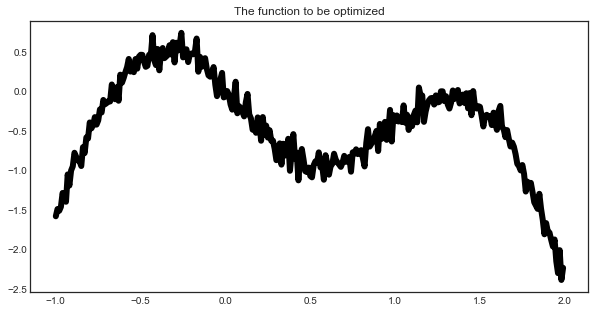

In [3]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.plot(X, y, c='k', linewidth=6)
    plt.title('The function to be optimized')
    plt.show()

### Setting a Gaussian Process prior¶


In [6]:
with pm.Model() as gp_fit:
    ρ = pm.Gamma('ρ', 1, 1)
    η = pm.Gamma('η', 1, 1)
    K = η * pm.gp.cov.Matern32(1, ρ)

with gp_fit:
    M = pm.gp.mean.Zero()
    σ = pm.HalfCauchy('σ', 2.5)

with gp_fit:
    y_obs = pm.gp.('y_obs', mean_func=M, cov_func=K, sigma=σ, observed={'X':X, 'Y':y})

AttributeError: module 'pymc3.gp' has no attribute 'GP'

: 

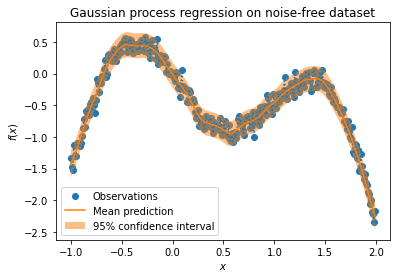

In [6]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, linestyle="dotted")
plt.scatter(X, y, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction.reshape(-1, ) - 1.96 * std_prediction,
    mean_prediction.reshape(-1, ) + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")